In [1]:
from tvb.simulator.models.oscillator import Generic2dOscillator
from tvb.simulator.integrators import HeunStochastic
from tvb.simulator.simulator import Simulator
from tvb.simulator.coupling import Linear
from tvb.simulator.monitors import Raw, TemporalAverage
from tvb.datatypes.connectivity import Connectivity
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle

/users/erichter/tvb/tvb-root/scientific_library/tvb/datatypes/surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
# Parameters
a_sim = 2.0
b_sim = -10.0
c_sim = 0.0
d_sim = 0.02
I_sim = 0.0
nsig = 0.003
dt = 1.0
simulation_length = 1000

In [3]:
connectivity = Connectivity()
connectivity.weights = np.array([[0., 2/3], [2/3, 0.]])
connectivity.region_labels = np.array(["R1", "R2"])
connectivity.centres = np.array([[0.1, 0.1, 0.1], [0.2, 0.1, 0.1]])
connectivity.tract_lengths = np.array([[0., 0.1], [0.1, 0.]])
connectivity.configure()

In [4]:
oscillator_model = Generic2dOscillator(
    a=np.asarray([a_sim]),
    b=np.asarray([b_sim]),
    c=np.asarray([c_sim]),
    d=np.asarray([d_sim]),
    I=np.asarray([I_sim]),
)
oscillator_model.configure()

In [5]:
integrator = HeunStochastic(dt=dt)
integrator.noise.nsig = np.array([nsig])
integrator.configure()

In [6]:
coupling = Linear()

In [7]:
monitor = Raw()

In [8]:
sim = Simulator(
    model=oscillator_model,
    connectivity=connectivity,
    coupling=coupling,
    integrator=integrator,
    monitors=(monitor,),
    simulation_length=simulation_length
)

In [9]:
sim.configure()

,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 92cc422c-000f-4d86-95eb-0070afddf9f3
coupling,Linear gid: ec611022-b779-411d-9aa7-e472f4799928
gid,UUID('bec28127-543f-49cf-9247-108aa35db472')
initial_conditions,None
integrator,HeunStochastic gid: 75f02e63-82af-4146-9657-93547d3ed794
model,Generic2dOscillator gid: c5869973-6ac1-4591-af40-e50e2b7ffd02
monitors,"(,)"
simulation_length,1000.0


In [10]:
(t, X), = sim.run()

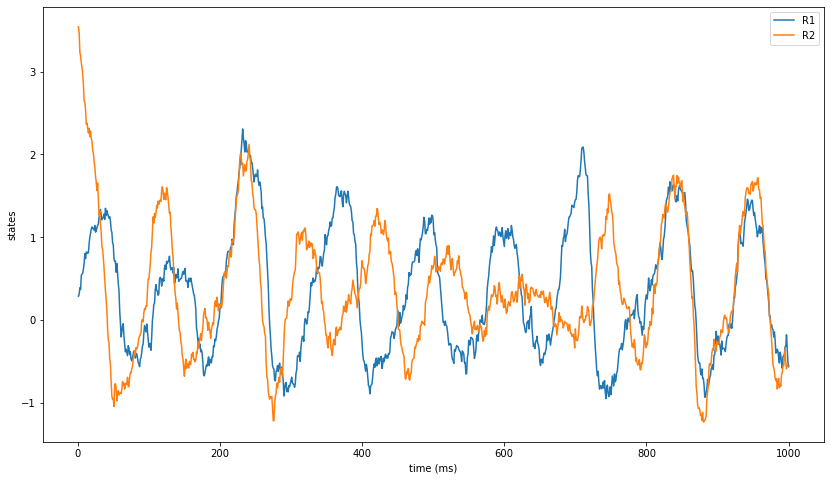

In [11]:
f1 = plt.figure(figsize=(14,8))
plt.plot(t, X[:, 0, 0, 0], label="R1")
plt.plot(t, X[:, 0, 1, 0], label="R2")
plt.xlabel("time (ms)")
plt.ylabel("states")
plt.legend()
plt.show()

In [12]:
X.shape

(1000, 1, 2, 1)

In [13]:
np.save(f"limit-cycle_simulation", X)